# Contexto

Instruções

Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas. Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos. \
Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal. 
- As pessoas desse experimento só verão 1 vídeo cada
- Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal
- As amostras são aleatorias e sem viéses sistematicos

**Objetivo:** Avaliar qual animal (cachorro ou gato) deve estar em um vídeo de campanha de adoção

Experimento: 500 pessoas que não possuem animais de estimação assistem aos vídeos de campanha de adoção. Os vídeos são idênticos com exceção dos animais mostrados:
- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Resposta: "Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?

# Bibliotecas

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from scipy import stats as st

# Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Andre\EBA\Aula-4\bases\cachorro_gato.csv')

In [3]:
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


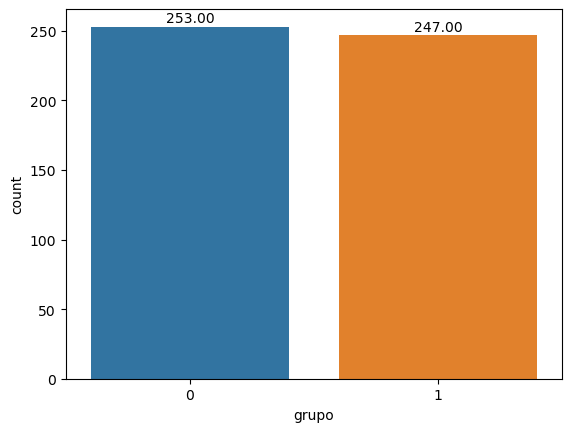

In [4]:
ax = sns.countplot(x=df["grupo"])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height)),
    ha='center')

O grupo com 0 tem uma ligeira quantidade de dados a mais que talvez não implique nesse teste...

1 = Gato \
0 = Cachorro


In [5]:
df.groupby('grupo').describe()

Unnamed: 0                                                           \
           count        mean         std  min    25%    50%    75%    max   
grupo                                                                       
0          253.0  247.470356  147.772334  1.0  117.0  256.0  366.0  499.0   
1          247.0  251.578947  141.301675  0.0  131.5  240.0  377.5  497.0   

      escore                                                         \
       count       mean        std        min        25%        50%   
grupo                                                                 
0      253.0  55.531922  14.665402  16.304739  44.488055  55.802372   
1      247.0  56.744495  14.913287  14.654955  48.682432  56.924405   

                             
             75%        max  
grupo                        
0      66.249013  95.309459  
1      66.817326  93.259671

A média é pouca coisa maior e a mediana também...

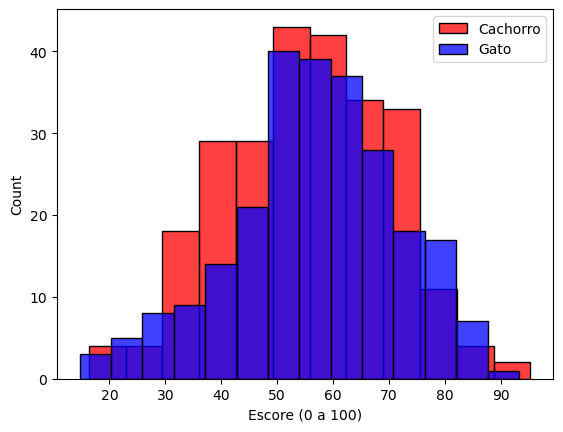

In [6]:
sns.histplot(df[df['grupo'] == 0]['escore'], label = 'Cachorro', color = "red") #histograma grupo que viu o video de cachorro
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Gato', color="blue")  #histograma grupo que viu o video de gato
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

In [7]:
skewCachorro = skew(df['grupo'] == 0)
skewGato = skew(df['grupo'] == 1)

In [8]:
skewCachorro, skewGato

(-0.024001728186646445, 0.024001728186646445)

Aqui temos uma normal para ambos os casos como foi visto no gráfico, e para ficar melhor, vimos também a skewness dos dois casos.

H0: MediaGato = MediaCachorro \
Ha: MediaGato != MediaCachorro

Teste bicaudal, isso significa que a média pode ser maior ou menor.

# Vamos comparar as médias dos escores dos dois grupos. São estatisticamente diferentes?

In [9]:
# Importando a função que realiza o teste-t para amostras independentes

from scipy.stats import ttest_ind

In [10]:
# a função retorna uma tupla. O primeiro valor é o valor do t e o segundo é o p-value

ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

TtestResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083, df=498.0)

In [11]:
t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

In [12]:
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


O nosso p-valor aqui foi de 0.36.

Estabelecendo o nível de significância como 5%, como p > 0,05, não temos evidencias suficientes para rejeitar a hipótese nula. Logo, dizemos que estatatisticamente as médias são iguais. Então, colocar um vídeo de um cachorro ou gato podem ter impactos identicos.